# AUTOMATIC TICKET ASSIGNMENT

# - Capstone Project 
- Batch aiml.2020.09
- Prem Vishnoi

# Problem
Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.


# . Problem interpretation
Understand the data
Make an abstract or an overview based on your approach
Break the problem into smaller tasks
Discuss among your teammates and share responsibilities

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy 
import scipy.stats as st
import matplotlib.pyplot as plt   


In [2]:
read_dir="/Users/vishnoiprem/OwnProject/OwnPoc/Learning/13_great_learning/great_learning/7_final_project/NLP/input_data.xlsx"

ticket_df=pd.read_excel(read_dir)

In [3]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [4]:
ticket_df.isnull().sum()
# it has null values 

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [5]:
ticket_df.dropna(inplace=True)

In [6]:
ticket_df.isnull().sum()


Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [7]:
#before remove caller id we can see that if similar string present we can clean desc
ticket_df['Caller email']=ticket_df.apply(lambda x : x['Caller'].replace(' ',''),axis=1)
ticket_df['Caller email']=ticket_df.apply(lambda x : x['Caller email']  +  '@gmail.com',axis=1)

In [8]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                Caller email  
0            GRP_0  spxjnwirpjlcoqds@gmail.com  
1            GRP_0  hmjdrvpbkomuaywn@gmail.com  
2            GRP_0  eylqgodmybqkwiam@gmail.com  
3            GRP_0  xbkucsvzgcpydteq@gmail.com  
4            GRP_0  owlgqjmeqhcozdfx@gmail.com

In [9]:
ticket_df['Description']=ticket_df.apply(lambda x : x['Description'].replace(x['Caller email'],'') ,axis=1)

In [10]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                Caller email  
0            GRP_0  spxjnwirpjlcoqds@gmail.com  
1            GRP_0  hmjdrvpbkomuaywn@gmail.com  
2            GRP_0  eylqgodmybqkwiam@gmail.com  
3            GRP_0  xbkucsvzgcpydteq@gmail.com  
4            GRP_0  owlgqjmeqhcozdfx@gmail.com

In [11]:
# since caller bame is no meaning with data analysis so lets drop it
ticket_df = ticket_df.drop(['Caller email'],axis=1)


In [12]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [16]:
ticket_df=ticket_df.drop(['Caller'], axis=1)

In [17]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0  
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

In [23]:
#remove space from trailing
ticket_df['Short description']=ticket_df['Short description'].str.strip()
ticket_df['Description']=ticket_df['Description'].str.strip()

In [22]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                    skype error   

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...            GRP_0  
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

In [26]:
#remove tabs and carriage returns
ticket_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"],value=[" "," "],regex=True,inplace=True)

In [27]:
ticket_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                    skype error   

                                         Description Assignment group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  received from: hmjdrvpb.komuaywn@gmail.com    ...            GRP_0  
2  received from: eylqgodm.ybqkwiam@gmail.com    ...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                        skype error            GRP_0

In [30]:
#Getting rid of numbers & special characters etc

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    ticket_df['Short description'] = ticket_df['Description'].str.replace(char, ' ')
    ticket_df['Description'] = ticket_df['Description'].str.replace(char, ' ')

In [31]:

ticket_df.head()



Short description  \
0   verified user details  employee    manager na...   
1  received from  hmjdrvpb komuaywn gmail com    ...   
2  received from  eylqgodm ybqkwiam gmail com    ...   
3                      unable to access hr tool page   
4                                        skype error   

                                         Description Assignment group  
0   verified user details  employee    manager na...            GRP_0  
1  received from  hmjdrvpb komuaywn gmail com    ...            GRP_0  
2  received from  eylqgodm ybqkwiam gmail com    ...            GRP_0  
3                      unable to access hr tool page            GRP_0  
4                                        skype error            GRP_0

In [38]:
#remove numbers   


ticket_df['Description']=ticket_df['Description'].str.replace('\d+','', regex=True)
ticket_df['Short description']=ticket_df['Short description'].str.replace('\d+','', regex=True)
ticket_df.head()

Short description  \
0   verified user details  employee    manager na...   
1  received from  hmjdrvpb komuaywn gmail com    ...   
2  received from  eylqgodm ybqkwiam gmail com    ...   
3                      unable to access hr tool page   
4                                        skype error   

                                         Description Assignment group  
0   verified user details  employee    manager na...            GRP_0  
1  received from  hmjdrvpb komuaywn gmail com    ...            GRP_0  
2  received from  eylqgodm ybqkwiam gmail com    ...            GRP_0  
3                      unable to access hr tool page            GRP_0  
4                                        skype error            GRP_0

In [39]:
#remove mire than 1 space

ticket_df.replace('\s+',regex=True,inplace=True)

Short description    None
Description          None
Assignment group     None
dtype: object

In [56]:
ticket_df.head()

Short description  \
0   verified user details  employee    manager na...   
1  received from  hmjdrvpb komuaywn gmail com    ...   
2  received from  eylqgodm ybqkwiam gmail com    ...   
3                      unable to access hr tool page   
4                                        skype error   

                                         Description Assignment group  \
0   verified user details  employee    manager na...            grp_0   
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0   
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0   
3                      unable to access hr tool page            grp_0   
4                                        skype error            grp_0   

   isSubstr  
0     False  
1     False  
2     False  
3     False  
4     False

In [42]:
##make lower case

ticket_df=ticket_df.apply( lambda x : x.astype(str).str.lower())

In [47]:
ticket_df.head()

Short description  \
0   verified user details  employee    manager na...   
1  received from  hmjdrvpb komuaywn gmail com    ...   
2  received from  eylqgodm ybqkwiam gmail com    ...   
3                      unable to access hr tool page   
4                                        skype error   

                                         Description Assignment group  
0   verified user details  employee    manager na...            grp_0  
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0  
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0  
3                      unable to access hr tool page            grp_0  
4                                        skype error            grp_0

In [58]:
#merge desc and sort desc
ticket_df['isSubstr']=ticket_df.apply(lambda x: x['Short description'] not in x['Description'] , axis =1)


In [64]:
ticket_df[ticket_df['isSubstr']==True]

Empty DataFrame
Columns: [Short description, Description, Assignment group, isSubstr]
Index: []

In [65]:
ticket_df_combined = ticket_df.copy()
ticket_df_combined.loc[ticket_df_combined['isSubstr'] == True, 'Description'] = ticket_df_combined['Short description'] + " "+ ticket_df_combined['Description']
#Drop Short description
ticket_df_combined = ticket_df_combined.drop(['Short description'],axis=1)
ticket_df_combined = ticket_df_combined.drop(['isSubstr'],axis=1)
ticket_df_combined.tail(10)

Description Assignment group
8490  please contact ed pasgryowski  pasgryo  about ...           grp_29
8491  received from  jxgobwrm qkugdipo gmail com  i ...           grp_34
8492                  hr tool etime option not visitble            grp_0
8493  i am sorry  i have another two accounts that n...           grp_10
8494  tablet needs reimaged due to multiple issues w...            grp_3
8495  received from  avglmrts vhqmtiua gmail com    ...           grp_29
8496                           telephony software issue            grp_0
8497  vip  windows password reset for tifpdchb pedxruyf            grp_0
8498  i am unable to access the machine utilities to...           grp_62
8499  an mehreren pc s lassen sich verschiedene prgr...           grp_49

In [66]:
ticket_df.head()

Short description  \
0   verified user details  employee    manager na...   
1  received from  hmjdrvpb komuaywn gmail com    ...   
2  received from  eylqgodm ybqkwiam gmail com    ...   
3                      unable to access hr tool page   
4                                        skype error   

                                         Description Assignment group  \
0   verified user details  employee    manager na...            grp_0   
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0   
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0   
3                      unable to access hr tool page            grp_0   
4                                        skype error            grp_0   

   isSubstr  
0     False  
1     False  
2     False  
3     False  
4     False

In [67]:
ticket_df=ticket_df_combined

In [68]:
ticket_df.head()

Description Assignment group
0   verified user details  employee    manager na...            grp_0
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0
3                      unable to access hr tool page            grp_0
4                                        skype error            grp_0

In [69]:
ticket_df['Assignment group'].value_counts()

grp_0     3968
grp_8      661
grp_24     289
grp_12     257
grp_9      252
          ... 
grp_67       1
grp_64       1
grp_73       1
grp_35       1
grp_70       1
Name: Assignment group, Length: 74, dtype: int64

In [71]:
# Observation :: We have 74 categories. There are few categories with very few tickets.
# It might make sense to consider only those categories with atleast 20 representations.
# Else our noise levels will be high
group_frequency = dict(ticket_df['Assignment group'].value_counts())

In [72]:
group_frequency

{'grp_0': 3968,
 'grp_8': 661,
 'grp_24': 289,
 'grp_12': 257,
 'grp_9': 252,
 'grp_2': 241,
 'grp_19': 215,
 'grp_3': 200,
 'grp_6': 184,
 'grp_13': 145,
 'grp_10': 140,
 'grp_5': 129,
 'grp_14': 118,
 'grp_25': 116,
 'grp_33': 107,
 'grp_4': 100,
 'grp_29': 97,
 'grp_18': 88,
 'grp_16': 85,
 'grp_17': 81,
 'grp_31': 69,
 'grp_7': 68,
 'grp_34': 61,
 'grp_26': 56,
 'grp_40': 45,
 'grp_28': 44,
 'grp_41': 40,
 'grp_30': 39,
 'grp_15': 39,
 'grp_42': 37,
 'grp_20': 36,
 'grp_45': 35,
 'grp_22': 31,
 'grp_1': 31,
 'grp_11': 30,
 'grp_21': 29,
 'grp_47': 27,
 'grp_62': 25,
 'grp_23': 25,
 'grp_48': 25,
 'grp_60': 20,
 'grp_39': 19,
 'grp_27': 18,
 'grp_37': 16,
 'grp_36': 15,
 'grp_44': 15,
 'grp_50': 14,
 'grp_65': 11,
 'grp_53': 11,
 'grp_52': 9,
 'grp_51': 8,
 'grp_55': 8,
 'grp_49': 6,
 'grp_59': 6,
 'grp_46': 6,
 'grp_43': 5,
 'grp_32': 4,
 'grp_66': 4,
 'grp_38': 3,
 'grp_58': 3,
 'grp_68': 3,
 'grp_56': 3,
 'grp_63': 3,
 'grp_72': 2,
 'grp_69': 2,
 'grp_71': 2,
 'grp_54': 2,
 'grp_

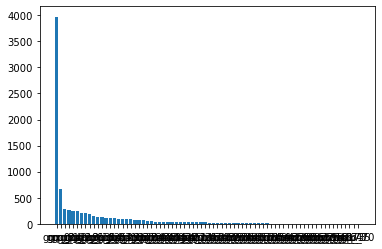

In [81]:
plt.bar(range(len(group_frequency)), group_frequency.values(), align='center')
plt.xticks(range(len(group_frequency)), list(group_frequency.keys()))
plt.show()

In [87]:
group_df=pd.DataFrame.from_dict(group_frequency,orient='index',columns=['frequency'])

In [88]:
group_df.head()

frequency
grp_0        3968
grp_8         661
grp_24        289
grp_12        257
grp_9         252

In [92]:
group_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

count        mean         std  min  10%   25%   50%   75%     95%  \
frequency   74.0  114.743243  464.840614  1.0  2.0  5.25  26.0  84.0  253.75   

               99%     max  
frequency  1553.89  3968.0

In [93]:
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df.head(10)

frequency  percent representation
grp_0        3968                0.467318
grp_8         661                0.077847
grp_24        289                0.034036
grp_12        257                0.030267
grp_9         252                0.029678
grp_2         241                0.028383
grp_19        215                0.025321
grp_3         200                0.023554
grp_6         184                0.021670
grp_13        145                0.017077

In [97]:
group_df['percent representation'].cumsum(axis=0)

grp_0     0.467318
grp_8     0.545165
grp_24    0.579202
grp_12    0.609469
grp_9     0.639147
            ...   
grp_67    0.999529
grp_64    0.999647
grp_73    0.999764
grp_35    0.999882
grp_70    1.000000
Name: percent representation, Length: 74, dtype: float64

In [98]:
group_df['cumulative percentage']=group_df['percent representation'].cumsum(axis=0)

In [100]:
group_df.head()

frequency  percent representation  cumulative percentage
grp_0        3968                0.467318               0.467318
grp_8         661                0.077847               0.545165
grp_24        289                0.034036               0.579202
grp_12        257                0.030267               0.609469
grp_9         252                0.029678               0.639147

In [102]:
group_df.head(35)

frequency  percent representation  cumulative percentage
grp_0        3968                0.467318               0.467318
grp_8         661                0.077847               0.545165
grp_24        289                0.034036               0.579202
grp_12        257                0.030267               0.609469
grp_9         252                0.029678               0.639147
grp_2         241                0.028383               0.667530
grp_19        215                0.025321               0.692851
grp_3         200                0.023554               0.716406
grp_6         184                0.021670               0.738076
grp_13        145                0.017077               0.755153
grp_10        140                0.016488               0.771641
grp_5         129                0.015193               0.786833
grp_14        118                0.013897               0.800730
grp_25        116                0.013662               0.814392
grp_33        107                0.012602               0.826993
grp_4         100                0.011777               0.838770
grp_29         97                0.011424               0.850194
grp_18         88                0.010364               0.860558
grp_16         85                0.010011               0.870569
grp_17         81                0.009540               0.880108
grp_31         69                0.008126               0.888235
grp_7          68                0.008008               0.896243
grp_34         61                0.007184               0.903427
grp_26         56                0.006595               0.910022
grp_40         45                0.005300               0.915322
grp_28         44                0.005182               0.920504
grp_41         40                0.004711               0.925215
grp_30         39                0.004593               0.929808
grp_15         39                0.004593               0.934401
grp_42         37                0.004358               0.938759
grp_20         36                0.004240               0.942998
grp_45         35                0.004122               0.947120
grp_22         31                0.003651               0.950771
grp_1          31                0.003651               0.954422
grp_11         30                0.003533               0.957955

In [103]:
### Observation  :::: 31 is our magic number for 95th percentile

In [104]:
inv_group_frequency = {}
for k, v in group_frequency.items():
    inv_group_frequency[v] = inv_group_frequency.get(v, [])
    inv_group_frequency[v].append(k)

In [105]:
inv_group_frequency

{3968: ['grp_0'],
 661: ['grp_8'],
 289: ['grp_24'],
 257: ['grp_12'],
 252: ['grp_9'],
 241: ['grp_2'],
 215: ['grp_19'],
 200: ['grp_3'],
 184: ['grp_6'],
 145: ['grp_13'],
 140: ['grp_10'],
 129: ['grp_5'],
 118: ['grp_14'],
 116: ['grp_25'],
 107: ['grp_33'],
 100: ['grp_4'],
 97: ['grp_29'],
 88: ['grp_18'],
 85: ['grp_16'],
 81: ['grp_17'],
 69: ['grp_31'],
 68: ['grp_7'],
 61: ['grp_34'],
 56: ['grp_26'],
 45: ['grp_40'],
 44: ['grp_28'],
 40: ['grp_41'],
 39: ['grp_30', 'grp_15'],
 37: ['grp_42'],
 36: ['grp_20'],
 35: ['grp_45'],
 31: ['grp_22', 'grp_1'],
 30: ['grp_11'],
 29: ['grp_21'],
 27: ['grp_47'],
 25: ['grp_62', 'grp_23', 'grp_48'],
 20: ['grp_60'],
 19: ['grp_39'],
 18: ['grp_27'],
 16: ['grp_37'],
 15: ['grp_36', 'grp_44'],
 14: ['grp_50'],
 11: ['grp_65', 'grp_53'],
 9: ['grp_52'],
 8: ['grp_51', 'grp_55'],
 6: ['grp_49', 'grp_59', 'grp_46'],
 5: ['grp_43'],
 4: ['grp_32', 'grp_66'],
 3: ['grp_38', 'grp_58', 'grp_68', 'grp_56', 'grp_63'],
 2: ['grp_72', 'grp_69', '

In [106]:
inv_group_df = pd.DataFrame.from_dict(inv_group_frequency, orient='index', columns=['group1', 'group2', 'group3', 'group4', 'group5', 'group6'])
inv_group_df.tail(10)

group1  group2  group3  group4  group5  group6
14  grp_50    None    None    None    None    None
11  grp_65  grp_53    None    None    None    None
9   grp_52    None    None    None    None    None
8   grp_51  grp_55    None    None    None    None
6   grp_49  grp_59  grp_46    None    None    None
5   grp_43    None    None    None    None    None
4   grp_32  grp_66    None    None    None    None
3   grp_38  grp_58  grp_68  grp_56  grp_63    None
2   grp_72  grp_69  grp_71  grp_54  grp_57    None
1   grp_61  grp_67  grp_64  grp_73  grp_35  grp_70

In [107]:
for key, value in inv_group_frequency.items():
    #print value
    print(key, len(value))

3968 1
661 1
289 1
257 1
252 1
241 1
215 1
200 1
184 1
145 1
140 1
129 1
118 1
116 1
107 1
100 1
97 1
88 1
85 1
81 1
69 1
68 1
61 1
56 1
45 1
44 1
40 1
39 2
37 1
36 1
35 1
31 2
30 1
29 1
27 1
25 3
20 1
19 1
18 1
16 1
15 2
14 1
11 2
9 1
8 2
6 3
5 1
4 2
3 5
2 5
1 6


In [108]:
#eliminate groups that have very less representation, that is we consider 95% significant data
group_elimination_treshold = 31

In [109]:
group_frequency_filtered = dict(filter(lambda x: x[1] >= group_elimination_treshold, group_frequency.items()))

In [110]:
group_frequency_filtered

{'grp_0': 3968,
 'grp_8': 661,
 'grp_24': 289,
 'grp_12': 257,
 'grp_9': 252,
 'grp_2': 241,
 'grp_19': 215,
 'grp_3': 200,
 'grp_6': 184,
 'grp_13': 145,
 'grp_10': 140,
 'grp_5': 129,
 'grp_14': 118,
 'grp_25': 116,
 'grp_33': 107,
 'grp_4': 100,
 'grp_29': 97,
 'grp_18': 88,
 'grp_16': 85,
 'grp_17': 81,
 'grp_31': 69,
 'grp_7': 68,
 'grp_34': 61,
 'grp_26': 56,
 'grp_40': 45,
 'grp_28': 44,
 'grp_41': 40,
 'grp_30': 39,
 'grp_15': 39,
 'grp_42': 37,
 'grp_20': 36,
 'grp_45': 35,
 'grp_22': 31,
 'grp_1': 31}

In [111]:
group_frequency

{'grp_0': 3968,
 'grp_8': 661,
 'grp_24': 289,
 'grp_12': 257,
 'grp_9': 252,
 'grp_2': 241,
 'grp_19': 215,
 'grp_3': 200,
 'grp_6': 184,
 'grp_13': 145,
 'grp_10': 140,
 'grp_5': 129,
 'grp_14': 118,
 'grp_25': 116,
 'grp_33': 107,
 'grp_4': 100,
 'grp_29': 97,
 'grp_18': 88,
 'grp_16': 85,
 'grp_17': 81,
 'grp_31': 69,
 'grp_7': 68,
 'grp_34': 61,
 'grp_26': 56,
 'grp_40': 45,
 'grp_28': 44,
 'grp_41': 40,
 'grp_30': 39,
 'grp_15': 39,
 'grp_42': 37,
 'grp_20': 36,
 'grp_45': 35,
 'grp_22': 31,
 'grp_1': 31,
 'grp_11': 30,
 'grp_21': 29,
 'grp_47': 27,
 'grp_62': 25,
 'grp_23': 25,
 'grp_48': 25,
 'grp_60': 20,
 'grp_39': 19,
 'grp_27': 18,
 'grp_37': 16,
 'grp_36': 15,
 'grp_44': 15,
 'grp_50': 14,
 'grp_65': 11,
 'grp_53': 11,
 'grp_52': 9,
 'grp_51': 8,
 'grp_55': 8,
 'grp_49': 6,
 'grp_59': 6,
 'grp_46': 6,
 'grp_43': 5,
 'grp_32': 4,
 'grp_66': 4,
 'grp_38': 3,
 'grp_58': 3,
 'grp_68': 3,
 'grp_56': 3,
 'grp_63': 3,
 'grp_72': 2,
 'grp_69': 2,
 'grp_71': 2,
 'grp_54': 2,
 'grp_

In [112]:
valid_grp_list = list(group_frequency_filtered)

In [113]:
valid_grp_list

['grp_0',
 'grp_8',
 'grp_24',
 'grp_12',
 'grp_9',
 'grp_2',
 'grp_19',
 'grp_3',
 'grp_6',
 'grp_13',
 'grp_10',
 'grp_5',
 'grp_14',
 'grp_25',
 'grp_33',
 'grp_4',
 'grp_29',
 'grp_18',
 'grp_16',
 'grp_17',
 'grp_31',
 'grp_7',
 'grp_34',
 'grp_26',
 'grp_40',
 'grp_28',
 'grp_41',
 'grp_30',
 'grp_15',
 'grp_42',
 'grp_20',
 'grp_45',
 'grp_22',
 'grp_1']

In [114]:
ticket_df_filtered = ticket_df_combined[ticket_df_combined['Assignment group'].isin(valid_grp_list)]
ticket_df_filtered.head(10)

Description Assignment group
0   verified user details  employee    manager na...            grp_0
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0
3                      unable to access hr tool page            grp_0
4                                        skype error            grp_0
5     unable to log in to engineering tool and skype            grp_0
6  event  critical hostname  company com the valu...            grp_1
7  ticket no  employment status   new non employe...            grp_0
8               unable to disable add ins on outlook            grp_0
9                          ticket update on inplant             grp_0

In [115]:
ticket_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8104 entries, 0 to 8497
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8104 non-null   object
 1   Assignment group  8104 non-null   object
dtypes: object(2)
memory usage: 189.9+ KB


In [116]:
ticket_df_filtered.describe()

Description Assignment group
count                                                8104             8104
unique                                               6444               34
top     received from  monitoring tool company com    ...            grp_0
freq                                                  414             3968

In [117]:
#We have reduced from 8500 to 8104

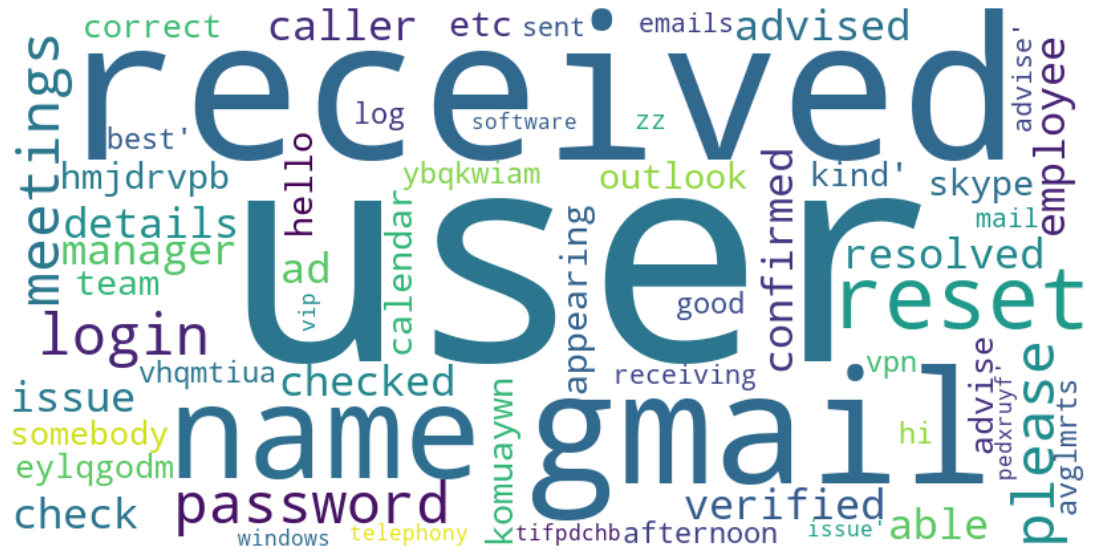

In [123]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords=STOPWORDS
wordcloud=WordCloud(stopwords= stopwords, max_words=500, background_color='white',width=820, height =410).generate(str(ticket_df_filtered['Description'].values))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [124]:
ticket_df_filtered.isna().sum()

Description         0
Assignment group    0
dtype: int64

In [126]:
from langdetect import detect

def detectLang(value):
    try:
        return detect(value)
    except:
        return "NotDetected"
    
        

In [129]:
ticket_df_filtered['lang']=ticket_df_filtered['Description'].apply(detectLang)

/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
ticket_df_filtered.head()

Description Assignment group lang
0   verified user details  employee    manager na...            grp_0   en
1  received from  hmjdrvpb komuaywn gmail com    ...            grp_0   en
2  received from  eylqgodm ybqkwiam gmail com    ...            grp_0   en
3                      unable to access hr tool page            grp_0   en
4                                        skype error            grp_0   no

In [131]:
ticket_df_filtered['lang'].value_counts()

en             6673
de              376
af              257
it              153
fr              111
sv               87
no               66
nl               66
da               64
ca               57
es               55
pl               28
pt               24
sl               12
ro               11
tl               11
cy                8
fi                6
et                6
sq                6
id                5
hr                5
tr                4
NotDetected       3
sk                2
cs                2
lt                2
so                2
hu                1
sw                1
Name: lang, dtype: int64

In [132]:
ticket_df_filtered_no = ticket_df_filtered[ticket_df_filtered.lang.eq('no')]

In [134]:
ticket_df_filtered_no.head()

Description Assignment group lang
4                                          skype error            grp_0   no
214                      ess kiosk user password reset            grp_0   no
402               password reset for yscgjexz hxlbvjgf            grp_0   no
428  i m unable to login erp system  engineering to...            grp_0   no
430              reset erp sid  password for vvtgryhud            grp_0   no

In [135]:
print(ticket_df_filtered_no)

                                            Description Assignment group lang
4                                           skype error            grp_0   no
214                       ess kiosk user password reset            grp_0   no
402                password reset for yscgjexz hxlbvjgf            grp_0   no
428   i m unable to login erp system  engineering to...            grp_0   no
430               reset erp sid  password for vvtgryhud            grp_0   no
...                                                 ...              ...  ...
7910            password reset request for kiosk users             grp_0   no
7934                        reset password for erp sid             grp_0   no
8117                           unable to login to skype            grp_0   no
8417             bluetooth keybankrd defekt  dardabthyr           grp_24   no
8471         to å°è´ºï¼œæ—©ä¸šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥           grp_30   no

[66 rows x 3 columns]


In [137]:
ticket_df_filtered_en=ticket_df_filtered[ticket_df_filtered.lang.eq('en')]

In [138]:
ticket_df_filtered_en['Assignment group'].value_counts()

grp_0     3122
grp_8      658
grp_9      248
grp_2      234
grp_12     228
grp_3      194
grp_19     193
grp_6      182
grp_13     140
grp_10     135
grp_5      126
grp_14     114
grp_4       99
grp_25      96
grp_29      90
grp_18      86
grp_16      81
grp_17      72
grp_7       68
grp_24      67
grp_26      53
grp_34      45
grp_40      43
grp_41      40
grp_15      37
grp_28      35
grp_20      35
grp_22      31
grp_45      31
grp_1       29
grp_33      28
grp_31      25
grp_42       5
grp_30       3
Name: Assignment group, dtype: int64

In [164]:
#Ref :: https://amitness.com/2019/07/identify-text-language-python/

import fasttext

# pretrained model from :: https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
PRETRAINED_MODEL_PATH = '/lid.176.bin'
lang_detect_model = fasttext.load_model(PRETRAINED_MODEL_PATH)


ValueError: /lid.176.bin cannot be opened for loading!

In [150]:
def predict_lang(sentence):
    detected_lang = lang_detect_model.predict(sentence)[0]
    detected_lang = detected_lang[0].replace('__label__', '')
    return detected_lang;

ticket_df_filtered['lang_predict'] = ticket_df_filtered['Description'].apply(lambda v: predict_lang(v))
ticket_df_filtered.head()

NameError: name 'lang_detect_model' is not defined

In [152]:
import fasttext
fasttext.FastText.eprint = print

In [159]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import fasttext

class LanguageIdentification:

    def __init__(self):
        pretrained_lang_model = "/tmp/lid.176.bin"
        self.model = fasttext.load_model(pretrained_lang_model)

    def predict_lang(self, text):
        predictions = self.model.predict(text, k=2)
        return predictions

if __name__ == '__main__':
    LANGUAGE = LanguageIdentification()
    lang = LANGUAGE.predict_lang("Hej")
    print(lang)


ValueError: /tmp/lid.176.bin cannot be opened for loading!